In [1]:
import pickle

def load_model(filename):
    model = pickle.load(open(filename, 'rb'))
    return model

In [4]:
path = 'D:/001.Project/LDA_master/autotrain/best/LN_modelOptimizerParameter_COconsumption_best.sav'
model = load_model(path)
model

HistGradientBoostingRegressor()

In [14]:
# ============================================
# Minh chứng model hồi quy có độ chính xác cao
# ============================================

# 1. Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 2. Load dữ liệu từ file CSV
# Thay 'data.csv' bằng đường dẫn file CSV của bạn
df_DCS_Items = pd.read_csv(r"D:\001.Project\LDA_master\data\_DCS_Items__20250915.csv")
df_DCS_Items.head()


C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_21776\1564484647.py:15: DtypeWarning: Columns (33,43,111,193) have mixed types. Specify dtype option on import or set low_memory=False.
  df_DCS_Items = pd.read_csv(r"D:\001.Project\LDA_master\data\_DCS_Items__20250915.csv")


,CronTime,B2_PT1061_DACA_PV__Value,B2_PT1061_DACA_PV__TimeStamp,B1_PT1061_DACA_PV__Value,B2_PT1071_DACA_PV__Value,B2_PT1071_DACA_PV__TimeStamp,B1_PT1071_DACA_PV__Value,B1_PT1071_DACA_PV__TimeStamp,B2_PT1111_DACA_PV__Value,B2_PT1111_DACA_PV__TimeStamp,...,CM_D091_COM_PBI_IN_3_16_PV2__TimeStamp,CM_D091_COM_PBI_IN_3_16_PV2__Value,B1_AVG_AT1011_AT1012,B1_AVG_PT1061_PT1071,B1_AVG_PT1211_PT1212,B1_AVG_TE1111_TE1112,B2_AVG_AT1011_AT1012,B2_AVG_PT1061_PT1071,B2_AVG_PT1211_PT1212,B2_AVG_TE1111_TE1112
0,2025-09-15 22:12:00.000,8.702049,2025-09-15 22:19:50.000,9.097036,8.719467,2025-09-15 22:19:50.000,9.441885,2025-09-15 22:19:50.000,276.2490,2025-09-15 22:19:50.000,...,2025-09-15 22:19:50.000,210.5903,4.843191,9.269460,-12.076379,157.1796,5.505651,8.710758,16.926475,145.29360
1,2025-09-15 22:10:00.000,8.717185,2025-09-15 22:17:50.000,9.065001,8.738164,2025-09-15 22:17:50.000,9.393832,2025-09-15 22:17:50.000,298.2082,2025-09-15 22:17:50.000,...,2025-09-15 22:17:50.000,207.8125,4.750726,9.229416,24.380583,157.1396,5.470384,8.727674,42.444120,145.31360
2,2025-09-15 22:08:00.000,8.732321,2025-09-15 22:16:10.000,9.076570,8.751519,2025-09-15 22:16:10.000,9.415190,2025-09-15 22:16:10.000,280.7208,2025-09-15 22:16:10.000,...,2025-09-15 22:16:10.000,208.7674,4.839780,9.245880,13.163130,157.1596,5.506119,8.741920,30.479255,145.33140
3,2025-09-15 22:07:00.000,8.678901,2025-09-15 22:14:30.000,9.077459,8.705221,2025-09-15 22:14:30.000,9.409849,2025-09-15 22:14:30.000,273.7128,2025-09-15 22:14:30.000,...,2025-09-15 22:14:30.000,209.5486,4.884534,9.243654,-4.504349,157.1262,5.525971,8.692061,10.477249,145.32255
4,2025-09-15 22:05:00.000,8.710062,2025-09-15 22:13:00.000,9.047205,8.739944,2025-09-15 22:13:00.000,9.367137,2025-09-15 22:13:00.000,255.6919,2025-09-15 22:13:00.000,...,2025-09-15 22:13:00.000,209.1146,4.885084,9.207171,16.715311,157.1351,5.511490,8.725003,1.504120,145.31805


In [15]:
df_DATA_CTCN = pd.read_csv(r"D:\001.Project\LDA_master\data\DATA_CTCN.csv")
df_DATA_CTCN.head()

,CronTime,LDA07060012000122,LDA07060012000140,LDA07060012000141,LDA07060012000142,LDA07060012000155,LDA07060012000156,LDA07060012000157,LDA07060012000158,LDA07060012000159,...,LDA12080012000235,LDA12080012000236,LDA12080012000237,LDA12080012000238,LDA12080012000243,LDA12080012004679,LDA12080012004779,LDA12080012004879,LDA12080012004979,LDA07060012000144
0,2024-10-29 03:45:00.000,2.58,0.003,0.003372,0.252046,1.000000e-10,1.000000e-10,1.000000e-10,1.09,1.87,...,13.341114,17.576529,37.413125,20.802165,7.589137,21.31,19.84,3.767,2.994,0.738104
1,2024-10-28 22:15:00.000,2.58,0.003,0.003372,0.252046,1.000000e-10,1.000000e-10,1.000000e-10,1.09,1.87,...,14.270352,18.090331,32.317347,18.453069,7.589137,21.31,19.84,3.767,2.994,0.738104
2,2024-10-28 21:31:00.000,2.58,0.003,0.003372,0.252046,1.000000e-10,1.000000e-10,1.000000e-10,1.09,1.87,...,14.270352,18.090331,32.317347,18.453069,7.584712,28.67,19.84,1.983,2.994,0.738104
3,2024-10-28 20:45:00.000,2.58,0.003,0.003372,0.252046,1.000000e-10,1.000000e-10,1.000000e-10,1.09,1.87,...,14.270352,18.090331,32.317347,18.453069,7.584712,24.22,19.84,1.983,2.994,0.738104
4,2024-10-28 19:03:00.000,2.58,0.003,0.003372,0.252046,1.000000e-10,1.000000e-10,1.000000e-10,1.09,1.87,...,14.270352,18.090331,32.317347,18.453069,7.584712,28.67,19.84,1.983,2.994,0.738104


In [17]:
df = pd.merge(
    df_DATA_CTCN,
    df_DCS_Items,
    on="CronTime",      # cột chung
    how="outer"         # hoặc "outer", "left", "right" tùy nhu cầu
)
df.ffill()
df

,CronTime,LDA07060012000122,LDA07060012000140,LDA07060012000141,LDA07060012000142,LDA07060012000155,LDA07060012000156,LDA07060012000157,LDA07060012000158,LDA07060012000159,...,CM_D091_COM_PBI_IN_3_16_PV2__TimeStamp,CM_D091_COM_PBI_IN_3_16_PV2__Value,B1_AVG_AT1011_AT1012,B1_AVG_PT1061_PT1071,B1_AVG_PT1211_PT1212,B1_AVG_TE1111_TE1112,B2_AVG_AT1011_AT1012,B2_AVG_PT1061_PT1071,B2_AVG_PT1211_PT1212,B2_AVG_TE1111_TE1112
0,2024-04-16 15:00:00.000,3.36,0.003,0.003961,0.238394,1.900000e-01,5.500000e-01,1.070000e+00,5.25,6.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-04-16 23:00:00.000,3.24,0.003,0.003961,0.238394,1.900000e-01,5.500000e-01,1.070000e+00,5.25,6.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-04-17 06:37:00.000,3.24,0.003,0.003961,0.238394,1.900000e-01,5.500000e-01,1.070000e+00,5.25,6.49,...,2024-04-17 13:40:50.000,207.5521,2.590855,8.622088,8.115165,162.97465,4.694025,8.485061,-16.534905,158.43030
3,2024-04-17 06:38:00.000,3.24,0.003,0.003961,0.238394,1.900000e-01,5.500000e-01,1.070000e+00,5.25,6.49,...,2024-04-17 13:42:10.000,205.3819,2.656030,8.546005,15.126115,162.96130,4.225968,8.528242,-58.970050,158.53265
4,2024-04-17 06:39:00.000,3.24,0.003,0.003961,0.238394,1.900000e-01,5.500000e-01,1.070000e+00,5.25,6.49,...,2024-04-17 13:43:10.000,195.4861,2.671216,8.603400,9.704360,162.95465,3.682704,8.470370,-11.114111,158.48375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351426,2025-09-15 22:05:00.000,2.58,0.003,0.003372,0.252046,1.000000e-10,1.000000e-10,1.000000e-10,1.09,1.87,...,2025-09-15 22:13:00.000,209.1146,4.885084,9.207171,16.715311,157.13510,5.511490,8.725003,1.504120,145.31805
351427,2025-09-15 22:07:00.000,2.58,0.003,0.003372,0.252046,1.000000e-10,1.000000e-10,1.000000e-10,1.09,1.87,...,2025-09-15 22:14:30.000,209.5486,4.884534,9.243654,-4.504349,157.12620,5.525971,8.692061,10.477249,145.32255
351428,2025-09-15 22:08:00.000,2.58,0.003,0.003372,0.252046,1.000000e-10,1.000000e-10,1.000000e-10,1.09,1.87,...,2025-09-15 22:16:10.000,208.7674,4.839780,9.245880,13.163130,157.15960,5.506119,8.741920,30.479255,145.33140
351429,2025-09-15 22:10:00.000,2.58,0.003,0.003372,0.252046,1.000000e-10,1.000000e-10,1.000000e-10,1.09,1.87,...,2025-09-15 22:17:50.000,207.8125,4.750726,9.229416,24.380583,157.13960,5.470384,8.727674,42.444120,145.31360


In [42]:
df_LH1 = df[['LDA12080012000243', 'LDA12080012000228', 'LDA12080012000227',
       'LDA12080012000230', 'LDA12080012000238', 'LDA12080012000237',
       'LDA12080012000232', 'LDA12080012000236', 'LDA12080012000235',
       'LDA12080012000234', 'LDA12080012000233', 'B1_FT1151_DACA_PV__Value',
       'B1_TE1251_DACA_PV__Value', 'B2_FT1151_DACA_PV__Value',
       'B1_Z_BEDT_DACA_PV__Value', 'B1_PT1281_DACA_PV__Value',
       'B1_AT1011_DACA_PV__Value', 'B1_AT1012_DACA_PV__Value',
       'B1_TE1212_DACA_PV__Value', 'B1_PT1061_DACA_PV__Value',
       'B1_PT1071_DACA_PV__Value', 'B1_PT1111_DACA_PV__Value',
       'B1_PT1112_DACA_PV__Value', 'B1_PT1211_DACA_PV__Value',
       'B1_PT1212_DACA_PV__Value', 'B1_TZ1131ZT_DACA_PV__Value',
       'B1_S051AIT_DACA_PV__Value', 'B1_AZ1011ZT_DACA_PV__Value',
       'B1_S052AIT_DACA_PV__Value', 'B1_S052AVFD_CRT_DACA_PV__Value',
       'B1_S052AVFD_FB_DACA_PV__Value', 'B1_PT1081_DACA_PV__Value',
       'B1_PT1082_DACA_PV__Value', 'B1_PT1091_DACA_PV__Value',
       'B1_PT1092_DACA_PV__Value', 'B1_TE1111_DACA_PV__Value',
       'B1_TE1112_DACA_PV__Value', 'B1_FT1151_DIVA_OUT__Value']]
df_LH1.dropna()

,LDA12080012000243,LDA12080012000228,LDA12080012000227,LDA12080012000230,LDA12080012000238,LDA12080012000237,LDA12080012000232,LDA12080012000236,LDA12080012000235,LDA12080012000234,...,B1_S052AIT_DACA_PV__Value,B1_S052AVFD_CRT_DACA_PV__Value,B1_S052AVFD_FB_DACA_PV__Value,B1_PT1081_DACA_PV__Value,B1_PT1082_DACA_PV__Value,B1_PT1091_DACA_PV__Value,B1_PT1092_DACA_PV__Value,B1_TE1111_DACA_PV__Value,B1_TE1112_DACA_PV__Value,B1_FT1151_DIVA_OUT__Value
25,7.124426,6.064401,28.094273,5989.759897,17.436796,29.787234,2.269504,17.254902,15.803087,13.937422,...,3.537557,19.33501,17.23549,32.74635,33.10723,33.07174,33.26518,162.5259,162.6362,0.145366
437,7.124426,6.064401,28.094273,5989.759897,17.436796,29.787234,2.269504,17.254902,15.803087,13.937422,...,3.190449,19.33184,17.12642,32.85870,33.20623,33.15405,33.38087,160.2443,160.1812,0.144671
917,7.124426,6.064401,28.094273,5989.759897,17.436796,29.787234,2.269504,17.254902,15.803087,13.937422,...,4.060444,20.05413,19.27901,34.27691,34.58440,34.59451,34.70231,163.1263,163.4145,0.144799
1397,7.124426,6.064401,28.094273,5989.759897,17.436796,29.787234,2.269504,17.254902,15.803087,13.937422,...,3.099221,18.32349,14.85473,32.69630,32.95929,32.96273,33.12169,154.5783,155.2312,0.148006
1877,6.715005,5.775662,29.134015,5893.081584,20.944552,32.369160,2.395210,17.284076,15.100308,9.966508,...,3.139272,18.32823,14.85027,32.35147,32.77131,32.65574,32.90924,157.1222,156.7834,0.147174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260650,8.449174,6.963438,28.658346,5930.864107,17.774474,39.887811,0.905620,17.590309,14.018518,8.610144,...,19.842750,33.44730,36.34842,34.14566,34.51655,34.55113,34.79908,162.6193,180.9064,0.156431
260691,8.449174,6.963438,28.658346,5930.864107,17.774474,39.887811,0.905620,17.590309,14.018518,8.610144,...,19.771540,33.44572,36.34509,34.07891,34.44981,34.50219,34.70898,163.5443,181.9515,0.149418
260859,8.449174,6.963438,28.658346,5930.864107,17.774474,39.887811,0.905620,17.590309,14.018518,8.610144,...,15.657420,30.43171,33.43229,33.95990,34.34414,34.36538,34.64113,155.4322,174.8400,0.146207
260871,8.449174,6.963438,28.658346,5930.864107,18.460822,33.888736,1.674814,17.011498,14.658496,12.310658,...,15.668550,30.43171,33.43229,34.18904,34.61221,34.65458,34.84023,154.8140,174.3597,0.150903


In [43]:
df_LH1.columns

Index(['LDA12080012000243', 'LDA12080012000228', 'LDA12080012000227',
       'LDA12080012000230', 'LDA12080012000238', 'LDA12080012000237',
       'LDA12080012000232', 'LDA12080012000236', 'LDA12080012000235',
       'LDA12080012000234', 'LDA12080012000233', 'B1_FT1151_DACA_PV__Value',
       'B1_TE1251_DACA_PV__Value', 'B2_FT1151_DACA_PV__Value',
       'B1_Z_BEDT_DACA_PV__Value', 'B1_PT1281_DACA_PV__Value',
       'B1_AT1011_DACA_PV__Value', 'B1_AT1012_DACA_PV__Value',
       'B1_TE1212_DACA_PV__Value', 'B1_PT1061_DACA_PV__Value',
       'B1_PT1071_DACA_PV__Value', 'B1_PT1111_DACA_PV__Value',
       'B1_PT1112_DACA_PV__Value', 'B1_PT1211_DACA_PV__Value',
       'B1_PT1212_DACA_PV__Value', 'B1_TZ1131ZT_DACA_PV__Value',
       'B1_S051AIT_DACA_PV__Value', 'B1_AZ1011ZT_DACA_PV__Value',
       'B1_S052AIT_DACA_PV__Value', 'B1_S052AVFD_CRT_DACA_PV__Value',
       'B1_S052AVFD_FB_DACA_PV__Value', 'B1_PT1081_DACA_PV__Value',
       'B1_PT1082_DACA_PV__Value', 'B1_PT1091_DACA_PV__Value',
   

In [44]:
rename_dict = {
    'B1_FT1151_DACA_PV__Value': 'FT1151_DACA_PV__Value',
    'B1_TE1251_DACA_PV__Value': 'TE1251_DACA_PV__Value',
    'B2_FT1151_DACA_PV__Value': 'FT1151_DACA_PV__Value_Other',
    'B1_Z_BEDT_DACA_PV__Value': 'Z_BEDT_DACA_PV__Value',
    'B1_PT1281_DACA_PV__Value': 'PT1281_DACA_PV__Value',
    'B1_AT1011_DACA_PV__Value': 'AT1011_DACA_PV__Value',
    'B1_AT1012_DACA_PV__Value': 'AT1012_DACA_PV__Value',
    'B1_TE1212_DACA_PV__Value': 'TE1212_DACA_PV__Value',
    'B1_PT1061_DACA_PV__Value': 'PT1061_DACA_PV__Value',
    'B1_PT1071_DACA_PV__Value': 'PT1071_DACA_PV__Value',
    'B1_PT1111_DACA_PV__Value': 'PT1111_DACA_PV__Value',
    'B1_PT1112_DACA_PV__Value': 'PT1112_DACA_PV__Value',
    'B1_PT1211_DACA_PV__Value': 'PT1211_DACA_PV__Value',
    'B1_PT1212_DACA_PV__Value': 'PT1212_DACA_PV__Value',
    'B1_TZ1131ZT_DACA_PV__Value': 'TZ1131ZT_DACA_PV__Value',
    'B1_S051AIT_DACA_PV__Value': 'S051AIT_DACA_PV__Value',
    'B1_AZ1011ZT_DACA_PV__Value': 'AZ1011ZT_DACA_PV__Value',
    'B1_S052AIT_DACA_PV__Value': 'S052AIT_DACA_PV__Value',
    'B1_S052AVFD_CRT_DACA_PV__Value': 'S052AVFD_CRT_DACA_PV__Value',
    'B1_S052AVFD_FB_DACA_PV__Value': 'S052AVFD_FB_DACA_PV__Value',
    'B1_PT1081_DACA_PV__Value': 'PT1081_DACA_PV__Value',
    'B1_PT1082_DACA_PV__Value': 'PT1082_DACA_PV__Value',
    'B1_PT1091_DACA_PV__Value': 'PT1091_DACA_PV__Value',
    'B1_PT1092_DACA_PV__Value': 'PT1092_DACA_PV__Value',
    'B1_TE1111_DACA_PV__Value': 'TE1111_DACA_PV__Value',
    'B1_TE1112_DACA_PV__Value': 'TE1112_DACA_PV__Value',
    'B1_FT1151_DIVA_OUT__Value': 'FT1151_DIVA_OUT__Value'
}

df_LH1 = df_LH1.rename(columns=rename_dict)

In [45]:
df_LH1.columns

Index(['LDA12080012000243', 'LDA12080012000228', 'LDA12080012000227',
       'LDA12080012000230', 'LDA12080012000238', 'LDA12080012000237',
       'LDA12080012000232', 'LDA12080012000236', 'LDA12080012000235',
       'LDA12080012000234', 'LDA12080012000233', 'FT1151_DACA_PV__Value',
       'TE1251_DACA_PV__Value', 'FT1151_DACA_PV__Value_Other',
       'Z_BEDT_DACA_PV__Value', 'PT1281_DACA_PV__Value',
       'AT1011_DACA_PV__Value', 'AT1012_DACA_PV__Value',
       'TE1212_DACA_PV__Value', 'PT1061_DACA_PV__Value',
       'PT1071_DACA_PV__Value', 'PT1111_DACA_PV__Value',
       'PT1112_DACA_PV__Value', 'PT1211_DACA_PV__Value',
       'PT1212_DACA_PV__Value', 'TZ1131ZT_DACA_PV__Value',
       'S051AIT_DACA_PV__Value', 'AZ1011ZT_DACA_PV__Value',
       'S052AIT_DACA_PV__Value', 'S052AVFD_CRT_DACA_PV__Value',
       'S052AVFD_FB_DACA_PV__Value', 'PT1081_DACA_PV__Value',
       'PT1082_DACA_PV__Value', 'PT1091_DACA_PV__Value',
       'PT1092_DACA_PV__Value', 'TE1111_DACA_PV__Value',
       'T

In [122]:
df_LH1 = df_LH1[(df_LH1["FT1151_DIVA_OUT__Value"] <= 0.16) & (df_LH1["FT1151_DIVA_OUT__Value"] > 0)]

In [135]:
df_LH1.to_csv(r"D:\001.Project\LDA_master\data\df_LH1.csv", index=False)

In [146]:
df_LH1= df_LH1.dropna()

In [147]:
X = df_LH1[['LDA12080012000243', 'LDA12080012000228', 'LDA12080012000227',
       'LDA12080012000230', 'LDA12080012000238', 'LDA12080012000237',
       'LDA12080012000232', 'LDA12080012000236', 'LDA12080012000235',
       'LDA12080012000234', 'LDA12080012000233', 'FT1151_DACA_PV__Value',
       'TE1251_DACA_PV__Value', 'FT1151_DACA_PV__Value_Other',
       'Z_BEDT_DACA_PV__Value', 'PT1281_DACA_PV__Value',
       'AT1011_DACA_PV__Value', 'AT1012_DACA_PV__Value',
       'TE1212_DACA_PV__Value', 'PT1061_DACA_PV__Value',
       'PT1071_DACA_PV__Value', 'PT1111_DACA_PV__Value',
       'PT1112_DACA_PV__Value', 'PT1211_DACA_PV__Value',
       'PT1212_DACA_PV__Value', 'TZ1131ZT_DACA_PV__Value',
       'S051AIT_DACA_PV__Value', 'AZ1011ZT_DACA_PV__Value',
       'S052AIT_DACA_PV__Value', 'S052AVFD_CRT_DACA_PV__Value',
       'S052AVFD_FB_DACA_PV__Value', 'PT1081_DACA_PV__Value',
       'PT1082_DACA_PV__Value', 'PT1091_DACA_PV__Value',
       'PT1092_DACA_PV__Value', 'TE1111_DACA_PV__Value',
       'TE1112_DACA_PV__Value']]
y = df_LH1[['FT1151_DIVA_OUT__Value']]

In [148]:
X.ffill()

,LDA12080012000243,LDA12080012000228,LDA12080012000227,LDA12080012000230,LDA12080012000238,LDA12080012000237,LDA12080012000232,LDA12080012000236,LDA12080012000235,LDA12080012000234,...,AZ1011ZT_DACA_PV__Value,S052AIT_DACA_PV__Value,S052AVFD_CRT_DACA_PV__Value,S052AVFD_FB_DACA_PV__Value,PT1081_DACA_PV__Value,PT1082_DACA_PV__Value,PT1091_DACA_PV__Value,PT1092_DACA_PV__Value,TE1111_DACA_PV__Value,TE1112_DACA_PV__Value
25,7.124426,6.064401,28.094273,5989.759897,17.436796,29.787234,2.269504,17.254902,15.803087,13.937422,...,100.05550,3.537557,19.33501,17.23549,32.74635,33.10723,33.07174,33.26518,162.5259,162.6362
437,7.124426,6.064401,28.094273,5989.759897,17.436796,29.787234,2.269504,17.254902,15.803087,13.937422,...,100.06440,3.190449,19.33184,17.12642,32.85870,33.20623,33.15405,33.38087,160.2443,160.1812
917,7.124426,6.064401,28.094273,5989.759897,17.436796,29.787234,2.269504,17.254902,15.803087,13.937422,...,100.06660,4.060444,20.05413,19.27901,34.27691,34.58440,34.59451,34.70231,163.1263,163.4145
1397,7.124426,6.064401,28.094273,5989.759897,17.436796,29.787234,2.269504,17.254902,15.803087,13.937422,...,100.05990,3.099221,18.32349,14.85473,32.69630,32.95929,32.96273,33.12169,154.5783,155.2312
1877,6.715005,5.775662,29.134015,5893.081584,20.944552,32.369160,2.395210,17.284076,15.100308,9.966508,...,100.05770,3.139272,18.32823,14.85027,32.35147,32.77131,32.65574,32.90924,157.1222,156.7834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260650,8.449174,6.963438,28.658346,5930.864107,17.774474,39.887811,0.905620,17.590309,14.018518,8.610144,...,97.88593,19.842750,33.44730,36.34842,34.14566,34.51655,34.55113,34.79908,162.6193,180.9064
260691,8.449174,6.963438,28.658346,5930.864107,17.774474,39.887811,0.905620,17.590309,14.018518,8.610144,...,97.89038,19.771540,33.44572,36.34509,34.07891,34.44981,34.50219,34.70898,163.5443,181.9515
260859,8.449174,6.963438,28.658346,5930.864107,17.774474,39.887811,0.905620,17.590309,14.018518,8.610144,...,97.89705,15.657420,30.43171,33.43229,33.95990,34.34414,34.36538,34.64113,155.4322,174.8400
260871,8.449174,6.963438,28.658346,5930.864107,18.460822,33.888736,1.674814,17.011498,14.658496,12.310658,...,97.88147,15.668550,30.43171,33.43229,34.18904,34.61221,34.65458,34.84023,154.8140,174.3597


In [149]:
# 4. Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Hàm bỏ prefix B1_, B2_
def normalize_colname(col):
    if col.startswith("B1_"):
        return col.replace("B1_", "")
    elif col.startswith("B2_"):
        return col.replace("B2_", "")
    return col

# Đổi tên toàn bộ cột trong df
df_LH1 = df_LH1.rename(columns=lambda c: normalize_colname(c))

# Đảm bảo X_test đúng với feature của model
X_test = X_test[model.feature_names_in_]


In [150]:
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]
X_test.head(), y_test.head()

(        LDA12080012000243  LDA12080012000228  LDA12080012000227  \
 177714           8.524074           5.891907          29.425040   
 236529           9.296901           6.222246          30.013682   
 234308           9.287809           6.164239          29.698490   
 175660           9.081820           6.066683          28.984269   
 258892           7.879383           6.670189          27.960105   
 
         LDA12080012000230  LDA12080012000238  LDA12080012000237  \
 177714        5873.965310          19.550105          38.537427   
 236529        5806.464972          18.564675          35.179833   
 234308        5869.010019          18.909307          38.731297   
 175660        5898.193352          19.219336          39.982434   
 258892        5985.716482          21.919084          34.162896   
 
         LDA12080012000232  LDA12080012000236  LDA12080012000235  \
 177714           0.123947          18.836574          14.428086   
 236529           0.405940          19.01404

In [151]:
X_test.describe()

,LDA12080012000243,LDA12080012000228,LDA12080012000227,LDA12080012000230,LDA12080012000238,LDA12080012000237,LDA12080012000232,LDA12080012000236,LDA12080012000235,LDA12080012000234,...,AZ1011ZT_DACA_PV__Value,S052AIT_DACA_PV__Value,S052AVFD_CRT_DACA_PV__Value,S052AVFD_FB_DACA_PV__Value,PT1081_DACA_PV__Value,PT1082_DACA_PV__Value,PT1091_DACA_PV__Value,PT1092_DACA_PV__Value,TE1111_DACA_PV__Value,TE1112_DACA_PV__Value
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,...,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,8.874033,6.255277,28.595611,5947.666761,19.198299,37.127770,0.546101,17.929291,15.141163,9.056752,...,98.663137,3.336346,18.814495,15.459293,31.621312,31.928646,32.051471,32.194810,158.483439,161.276214
std,0.585429,0.250638,0.753173,63.762143,1.632609,2.984501,0.688296,0.913368,1.093450,1.878420,...,0.997246,1.911716,1.756573,3.196069,1.893617,1.878648,1.890091,1.852527,7.069935,6.017310
min,6.365074,5.427059,26.015489,5753.762484,14.620547,28.223568,0.000000,15.088899,11.827869,4.785726,...,97.874790,2.291527,18.318750,5.722324,27.261480,27.863740,27.799320,28.083970,136.116900,143.280900
25%,8.580947,6.108955,28.127974,5897.959582,18.031346,35.345479,0.000017,17.373546,14.375491,7.915865,...,97.885930,2.838892,18.325070,14.119290,30.234723,30.464068,30.627130,30.641483,153.947800,157.973100
50%,8.946275,6.250552,28.631496,5946.710185,19.124262,37.152229,0.335394,17.834692,15.078004,8.944034,...,97.894820,3.059171,18.326650,14.990510,31.334255,31.852530,31.829830,32.167315,158.131800,160.657100
75%,9.289163,6.405771,29.081017,5995.555906,20.419096,38.731297,0.808835,18.575574,15.928102,9.958319,...,99.870243,3.314496,19.191578,16.530113,32.331735,32.778260,32.817017,33.103065,162.697125,164.222900
max,10.030828,6.980801,30.937809,6099.884601,24.213873,45.100356,7.100534,21.751617,18.397362,15.073043,...,100.084400,19.974020,33.448880,36.347310,37.270180,37.220610,37.613360,37.390790,178.140900,192.073900


In [152]:
y_test.describe()

,FT1151_DIVA_OUT__Value
count,514.000000
mean,0.146930
std,0.004006
min,0.132562
25%,0.144452
50%,0.146904
75%,0.149699
max,0.159965


In [153]:
path = r'D:\001.Project\LDA_master\autotrain\best\LH_modelOptimizerParameter_CoalConsumption_best.sav'
model = load_model(path)
# 6. Dự đoán trên tập test
y_pred = model.predict(X_test)

# 7. Đánh giá mô hình
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\n=== Đánh giá mô hình trên tập test ===")
print(f"R²: {r2:.5f}")
print(f"RMSE: {rmse:.5f}")
print(f"MAE: {mae:.5f}")



=== Đánh giá mô hình trên tập test ===
R²: 0.24525
RMSE: 0.00348
MAE: 0.00269


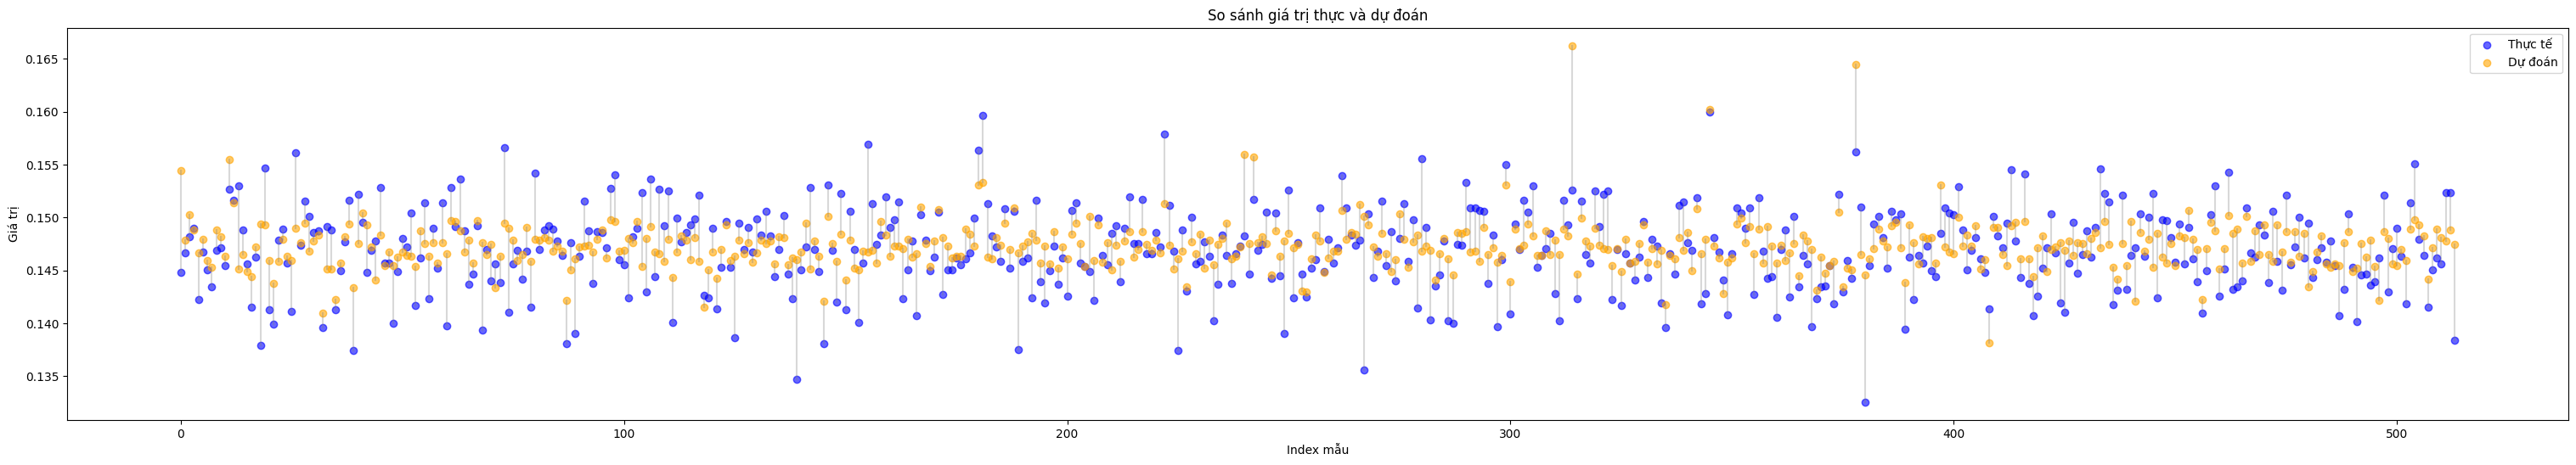

In [155]:
import matplotlib.pyplot as plt
import numpy as np

# Chuyển sang array
y_test_arr = y_test.to_numpy().ravel()   # flatten nếu multi-column
y_pred_arr = y_pred.ravel()              # nếu y_pred là array 2D

plt.figure(figsize=(38,6))

# Vẽ điểm
plt.scatter(range(len(y_test_arr)), y_test_arr, color='blue', alpha=0.6, label='Thực tế')
plt.scatter(range(len(y_pred_arr)), y_pred_arr, color='orange', alpha=0.6, label='Dự đoán')

# Vẽ đường nối
for i in range(len(y_test_arr)):
    plt.plot([i, i], [y_test_arr[i], y_pred_arr[i]], color='gray', alpha=0.3)

plt.xlabel('Index mẫu')
plt.ylabel('Giá trị')
plt.title('So sánh giá trị thực và dự đoán')
plt.legend()
plt.show()
